In [96]:
import modelo as m
import networkx as nx
import Bio.KEGG.REST as rkg
import Bio.KEGG.Enzyme as ex

eco = m.get_network("eco", opt='eco')

Retrieving data from KEGG PATHWAY database. Tue Mar 20 21:17:59 2018
Building graphs.


In [98]:
eco_nodes = list(eco.grafo.nodes())
eco_nodes.remove('undefined')
orf_queries = []
product_queries = []

for i in range(len(eco_nodes)):
    gene = rkg.kegg_get(eco_nodes[i])
    tmp = ex.read(gene)
    if eco_nodes[i].startswith("eco:"):
        orf_queries.append(tmp.name[0])
    elif tmp.name != []:
        product_queries.append(tmp.name)

In [99]:
import pandas as pd

eco_data = pd.read_table('PECData.dat')
eco_data.rename(columns={'Class(1:essential 2:noessential 3:unknown)': 'Class',
                         'Alternative name': 'AltName'}, inplace=True)
eco_data = eco_data[['Orf','AltName','Class','Product']]
eco_data['AltName'] = eco_data['AltName'].apply(lambda x: x.split(','))
eco_data = eco_data.drop_duplicates(subset='Orf', keep='first')
eco_data.tail()

,Orf,AltName,Class,Product
4492,creC,"[b4399, ECK4391, JW4362, o474, phoM]",2,sensory histidine kinase in two-component regu...
4493,creD,"[b4400, cet, ECK4392, JW4363, refII]",2,inner membrane protein
4494,arcA,"[b4401, cpxC, dye, ECK4393, fexA, JW4364, msp,...",2,DNA-binding response regulator in two-componen...
4495,yjjY,"[b4402, ECK4394, JW4365, o46]",2,hypothetical protein
4496,yjtD,"[b4403, ECK4395, JW4366, lasT, o228b]",2,putative methyltransferase


In [100]:
#Amount of associations in database by node
eco_info = {}
for orf in orf_queries:
    if orf in list(eco_data['Orf']):
        eco_info[orf] = 1
    elif any(orf in x for x in list(eco_data['AltName'])):
        eco_info[orf] = 1
    else:
        eco_info[orf] = 0
for query in product_queries:
    eco_info[tuple(query)] = 0
    for product in query:
        for data in list(eco_data['Product']):
            if product in str(data):
                eco_info[tuple(query)] += 1
eco_info.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [101]:
#Nodes with more than 1 association in Escherichia coli MG1655 database
[k for k in eco_info if eco_info[k] > 1]

[('Lipopolysaccharide', 'LPS'),
 ('Zinc cation', 'Zn2+', 'Zn(II)', 'Zinc ion'),
 ('AI-2', 'Autoinducer 2'),
 ('D-Glucose', 'Grape sugar', 'Dextrose', 'Glucose', 'D-Glucopyranose'),
 ('Potassium cation', 'K+', 'Potassium(1+)', 'Potassium ion'),
 ('Glycine', 'Aminoacetic acid', 'Gly'),
 ("3',5'-Cyclic AMP",
  'Cyclic adenylic acid',
  'Cyclic AMP',
  "Adenosine 3',5'-phosphate",
  "Adenosine 3',5'-cyclic phosphate",
  'cAMP')]

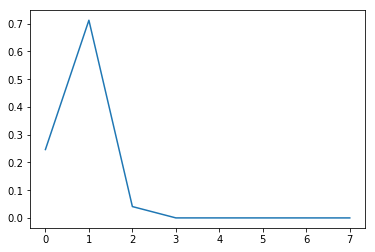

In [102]:
#Node frequency distribution
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

h = sorted(eco_info.values())
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)
plt.show()

In [103]:
mge = m.get_network("mge", opt='mge')

Retrieving data from KEGG PATHWAY database. Tue Mar 20 21:42:04 2018
Building graphs.


In [104]:
mge_nodes = list(mge.grafo.nodes())
mge_nodes.remove('undefined')
orf_queries = []
product_queries = []

for i in range(len(mge_nodes)):
    gene = rkg.kegg_get(mge_nodes[i])
    tmp = ex.read(gene)
    if mge_nodes[i].startswith("mge:") and tmp.name != []:
        orf_queries.append(tmp.name[0])
    elif tmp.name != []:
        product_queries.append(tmp.name)

In [105]:
md1 = pd.read_table('./deg-np-15.2/degannotation-np.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 
                                                                      'Function', 'Organism', 'Refseq', 'Condition'])
md1.drop(0, inplace=True)
md2 = pd.read_table('./deg-p-15.2/degannotation-p.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 
                                                                      'Function', 'Organism', 'Refseq', 'Condition'])
md2.drop(0, inplace=True)
mge_data = pd.concat([md1, md2])
mge_data = mge_data[mge_data['Refseq'] == 'Mycoplasma genitalium G37']
mge_data = mge_data[['Gene_Ref','Organism']]
mge_data['Gene_Ref'] = mge_data['Gene_Ref'].apply(lambda x: x.split('/'))
mge_data.tail(5)

,Gene_Ref,Organism
2371,[MG_467],"ABC transporter, ATP-binding protein"
2372,[MG_468],"ABC transporter, permease protein"
2373,"[MG468.1, MG_526]","ABC transporter, ATP-binding protein"
2374,[dnaA],chromosomal replication initiator protein DnaA
2375,[soj],CobQ/CobB/MinD/ParA nucleotide binding domain


In [109]:
#Amount of associations in database by node
mge_info = {}
for index, row in mge_data.iterrows():
    if any(x in row['Gene_Ref'] for x in orf_queries):
        mge_info[row['Gene_Ref'][0]] = 1
        continue
    for query in product_queries:
        if tuple(query) not in mge_info:
            mge_info[tuple(query)] = 0
        for product in query:
            if product.lower() in row['Organism']:
                mge_info[tuple(query)] += 1
                break
mge_info.values()

dict_values([0, 0, 0, 0, 0, 0, 4, 0, 0, 10, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [110]:
#Nodes with more than 1 association in Mycoplasma genitalium G37 database
[k for k in mge_info if mge_info[k] > 1]

[('Oligopeptide',),
 ('Orthophosphate', 'Phosphate', 'Phosphoric acid', 'Orthophosphoric acid'),
 ('Putrescine',
  '1,4-Butanediamine',
  '1,4-Diaminobutane',
  'Tetramethylenediamine',
  'Butane-1,4-diamine')]

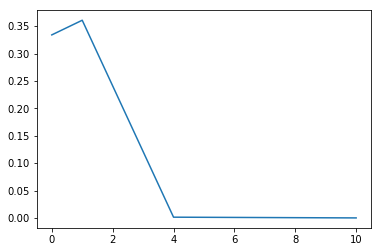

In [111]:
#Node frequency distribution
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

h = sorted(mge_info.values())
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)
plt.show()